In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
wintercover = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/15.png', cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2RGB)
halloweencover = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/16.png', cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2RGB)
wintercover = cv2.resize(wintercover, (256, 256))
halloweencover = cv2.resize(halloweencover, (256, 256), interpolation=cv2.INTER_LINEAR)

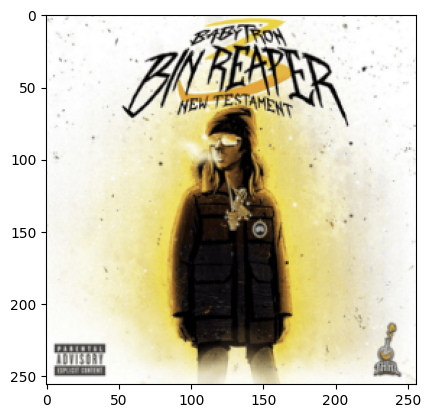

In [ ]:
plt.imshow(wintercover)

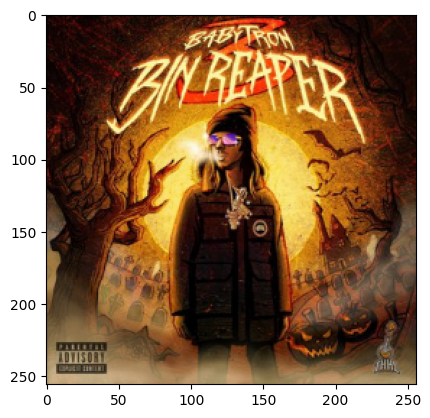

In [ ]:
plt.imshow(halloweencover)

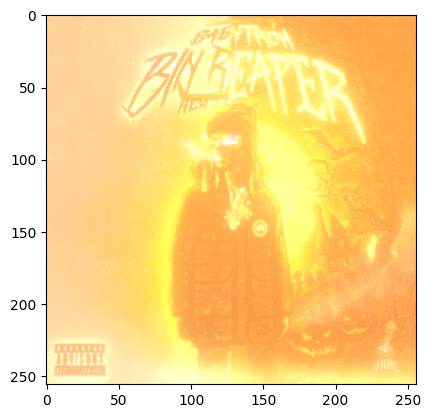

In [ ]:
gauss1 = [wintercover]
for i in range(10):
    gauss1.append(cv2.pyrDown(gauss1[i]))
gauss2 = [halloweencover]
for i in range(10):
    gauss2.append(cv2.pyrDown(gauss2[i]))
lapl1 = [gauss1[9]]
for i in range(9, 0, -1):
    t = cv2.pyrUp(gauss1[i])
    if(np.prod(t.shape) < np.prod(gauss1[i-1].shape)):
        gauss1[i-1] = np.resize(gauss1[i-1], t.shape)
    else:
        t = np.resize(t, gauss1[i-1].shape)
    lapl1.append(cv2.subtract(gauss1[i-1], t))
lapl2 = [gauss2[9]]
for i in range(9, 0, -1):
    t = cv2.pyrUp(gauss2[i])
    if(np.prod(t.shape) < np.prod(gauss2[i-1].shape)):
        gauss2[i-1] = np.resize(gauss2[i-1], t.shape)
    else:
        t = np.resize(t, gauss2[i-1].shape)
    lapl2.append(cv2.subtract(gauss2[i-1], t))
LS = []
for la, lb in zip(lapl1, lapl2):
    rows, cols, dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
ls_ = LS[0]
for i in range(10):
    ls_ = cv2.pyrUp(ls_)
    if(np.prod(ls_.shape) < np.prod(LS[i].shape)):
        LS[i] = np.resize(LS[i], ls_.shape)
    else:
        ls_ = np.resize(ls_, LS[i].shape)
    ls_ = cv2.add(ls_, LS[i])
plt.imshow(ls_)